In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'])
df.drop(columns=['AccumulateReleased'], inplace=True)
df_jeju = df.loc[df['areaNm'] == '제주특별자치도']

<AxesSubplot:xlabel='baseYmd', ylabel='Outside_count'>

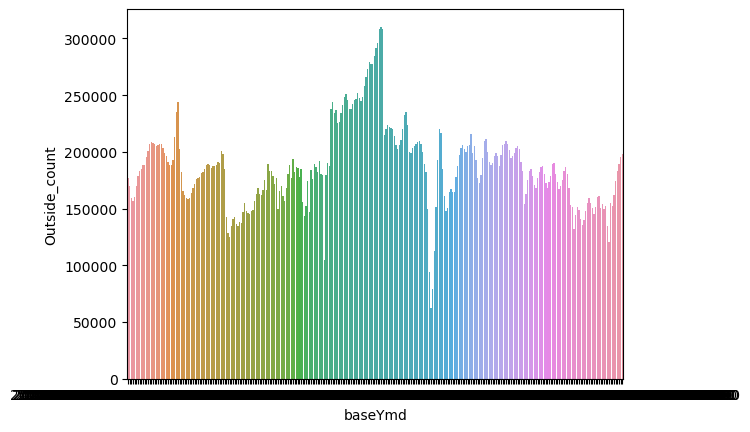

In [28]:
sns.barplot(x='baseYmd', y='Outside_count', data=df_jeju)

<AxesSubplot:xlabel='baseYmd', ylabel='increase'>

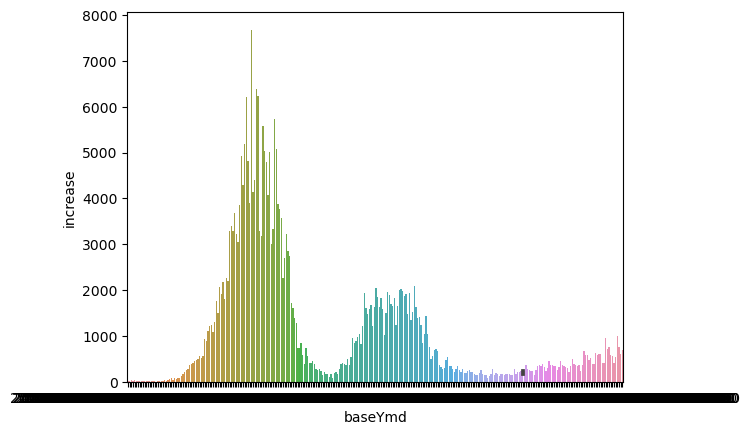

In [7]:
sns.barplot(x='baseYmd', y='increase', data=df_jeju)

<AxesSubplot:xlabel='baseYmd', ylabel='AccumulateCovid19'>

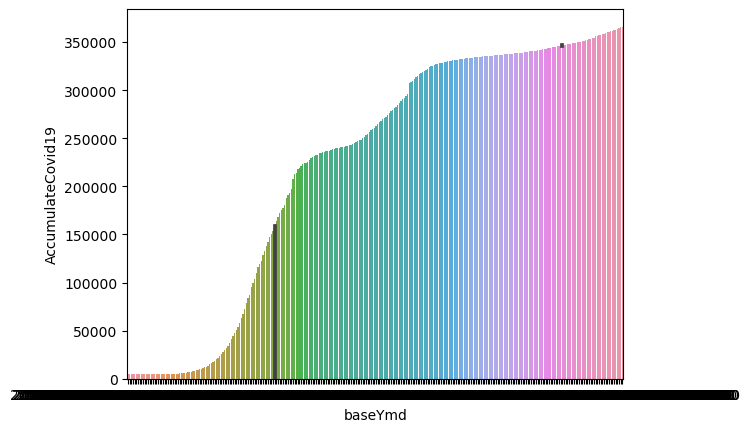

In [6]:
sns.barplot(x='baseYmd', y='AccumulateCovid19', data=df_jeju)

<AxesSubplot:xlabel='baseYmd', ylabel='avgTemp'>

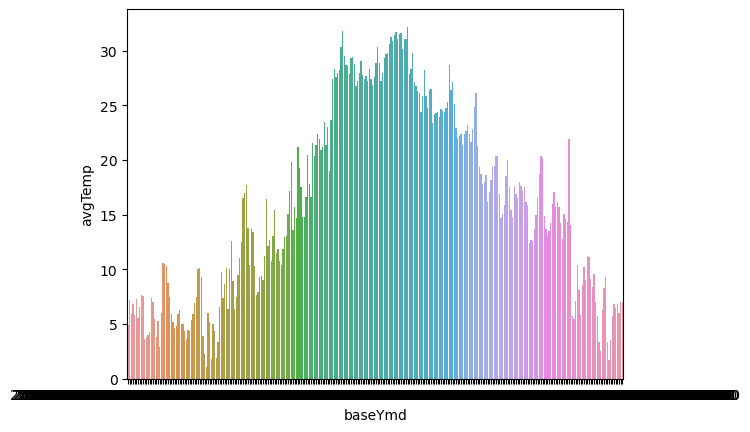

In [8]:
sns.barplot(x='baseYmd', y='avgTemp', data=df_jeju)

<AxesSubplot:xlabel='baseYmd', ylabel='Outside_count'>

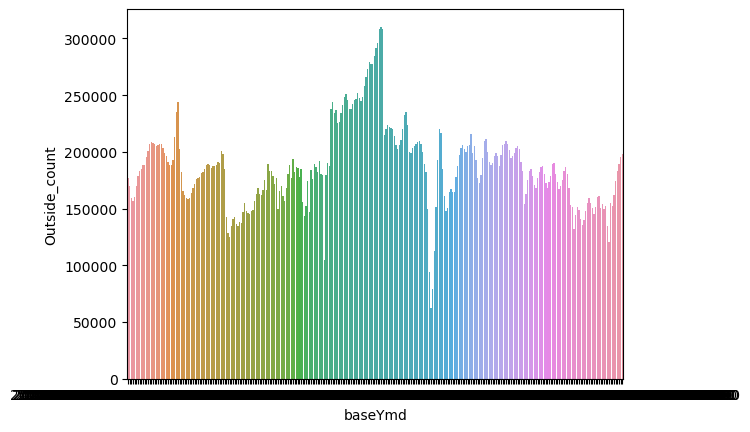

In [9]:
sns.barplot(x='baseYmd', y='Outside_count', data=df_jeju)

<AxesSubplot:xlabel='baseYmd', ylabel='Local_count'>

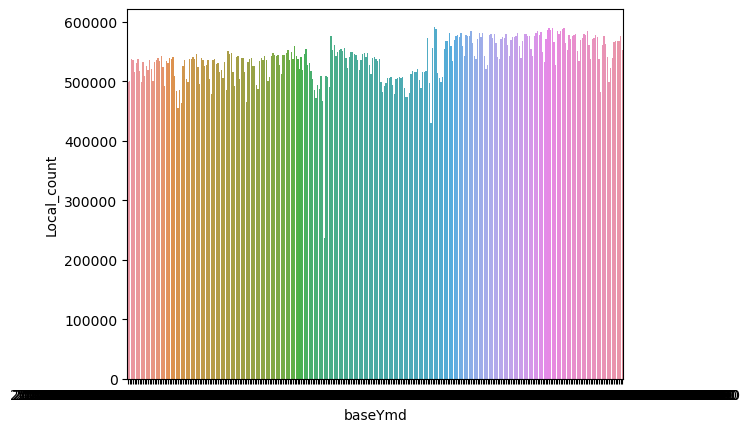

In [10]:
sns.barplot(x='baseYmd', y='Local_count', data=df_jeju)

In [11]:
df_jeju.head()

,areaNm,daywkDivNm,baseYmd,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
16,제주특별자치도,토요일,2022-01-01,4.9,0.0,0.0,0,1,4661.0,23.0,22.0,1.0,0,0,498666,176764,689,676119
33,제주특별자치도,일요일,2022-01-02,7.2,0.0,0.0,0,1,4680.0,19.0,18.0,1.0,0,0,500654,169652,900,671206
50,제주특별자치도,월요일,2022-01-03,6.0,0.0,0.0,0,0,4708.0,28.0,27.0,1.0,0,0,537145,159526,723,697395
67,제주특별자치도,화요일,2022-01-04,6.8,0.0,0.0,0,0,4726.0,18.0,17.0,1.0,0,0,536064,156488,734,693286
84,제주특별자치도,수요일,2022-01-05,5.8,18.8,0.0,0,0,4769.0,43.0,43.0,0.0,0,0,515952,160192,869,677013


In [12]:
df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 16 to 5260
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   areaNm             306 non-null    object        
 1   daywkDivNm         306 non-null    object        
 2   baseYmd            306 non-null    datetime64[ns]
 3   avgTemp            306 non-null    float64       
 4   dayRf              306 non-null    float64       
 5   daySf              306 non-null    float64       
 6   festival           306 non-null    int64         
 7   holiday            306 non-null    int64         
 8   AccumulateCovid19  306 non-null    float64       
 9   increase           306 non-null    float64       
 10  localIncrease      306 non-null    float64       
 11  CovidForeigner     306 non-null    float64       
 12  PM10               306 non-null    int64         
 13  PM25               306 non-null    int64         
 14  Local_co

In [13]:
df_jeju.isnull().sum()

areaNm               0
daywkDivNm           0
baseYmd              0
avgTemp              0
dayRf                0
daySf                0
festival             0
holiday              0
AccumulateCovid19    0
increase             0
localIncrease        0
CovidForeigner       0
PM10                 0
PM25                 0
Local_count          0
Outside_count        0
Foreigner_count      0
Total_count          0
dtype: int64

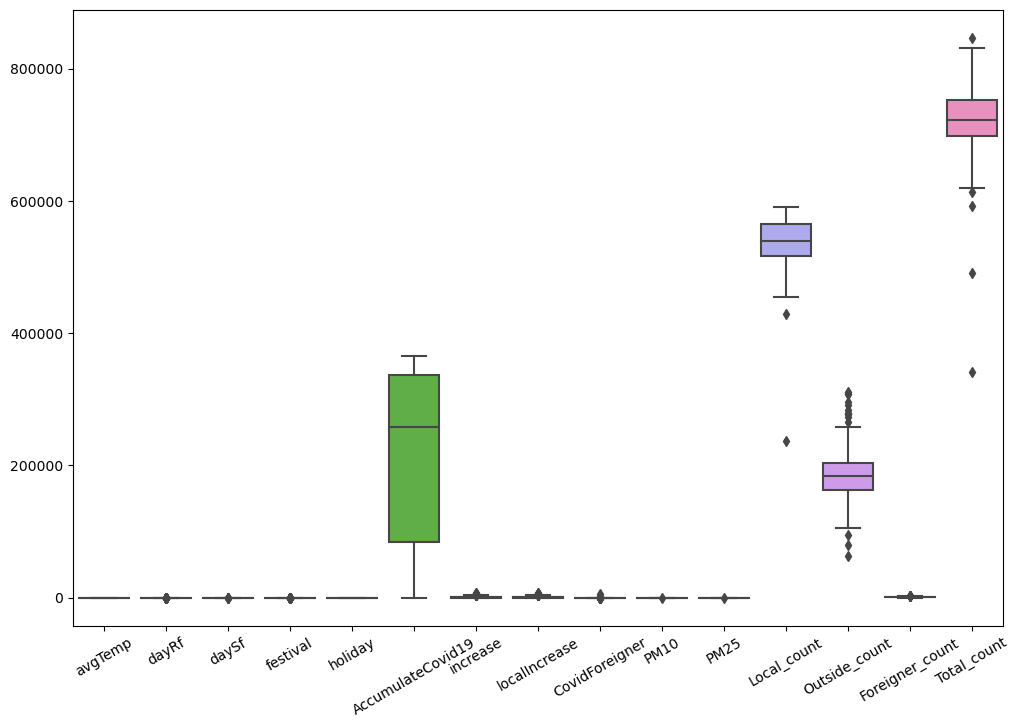

In [14]:
plt.figure(figsize=(12, 8))
df_box = sns.boxplot(data=df_jeju)
df_box.set_xticklabels(df_box.get_xticklabels(),rotation = 30)
plt.show()

In [15]:
df_jeju.columns

Index(['areaNm', 'daywkDivNm', 'baseYmd', 'avgTemp', 'dayRf', 'daySf',
       'festival', 'holiday', 'AccumulateCovid19', 'increase', 'localIncrease',
       'CovidForeigner', 'PM10', 'PM25', 'Local_count', 'Outside_count',
       'Foreigner_count', 'Total_count'],
      dtype='object')

In [16]:
df_jeju
dfy = df_jeju.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd', 'avgTemp', 'dayRf', 'daySf', 'festival', 
                            'holiday', 'AccumulateCovid19', 'increase', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25'])
dfX = df_jeju.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd', 'Local_count', 'Outside_count', 'Foreigner_count', 'Total_count'])
dfX.astype(float)
df_Xy = pd.concat([dfy, dfX], axis=1)

In [17]:
scaler = StandardScaler()
df_sample = scaler.fit_transform(df_Xy)
df_jeju_scaled = pd.DataFrame(df_sample, columns=df_Xy.columns)
df_jeju_scaled

,Local_count,Outside_count,Foreigner_count,Total_count,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,localIncrease,CovidForeigner,PM10,PM25
0,-1.098657,-0.273141,0.005152,-0.989899,-1.294199,-0.211044,-0.110116,-0.498979,1.467869,-1.629180,-0.751443,-0.741066,-0.086706,-0.05726,-0.05726
1,-1.042041,-0.472774,0.447463,-1.090577,-1.027469,-0.211044,-0.110116,-0.498979,1.467869,-1.629036,-0.754265,-0.743925,-0.086706,-0.05726,-0.05726
2,-0.002818,-0.757010,0.076425,-0.553909,-1.166632,-0.211044,-0.110116,-0.498979,-0.681260,-1.628825,-0.747915,-0.737491,-0.086706,-0.05726,-0.05726
3,-0.033603,-0.842287,0.099483,-0.638111,-1.073857,-0.211044,-0.110116,-0.498979,-0.681260,-1.628689,-0.754971,-0.744640,-0.086706,-0.05726,-0.05726
4,-0.606371,-0.738316,0.382479,-0.971579,-1.189826,1.437867,-0.110116,-0.498979,-0.681260,-1.628364,-0.737331,-0.726052,-0.089758,-0.05726,-0.05726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.870944,-0.336916,-0.806102,0.372849,-1.108647,-0.211044,-0.110116,-0.498979,-0.681260,1.078519,-0.383125,-0.367163,-0.089758,-0.05726,-0.05726
302,0.881993,-0.103963,-0.680326,0.552114,-1.073857,-0.211044,-0.110116,-0.498979,-0.681260,1.086039,-0.065611,-0.046164,-0.086706,-0.05726,-0.05726
303,0.872538,0.078182,-0.751599,0.677567,-1.166632,-0.211044,-0.110116,-0.498979,-0.681260,1.091700,-0.239185,-0.221319,-0.089758,-0.05726,-0.05726
304,1.105667,0.259935,-0.824968,0.977285,-1.050663,-0.211044,-0.110116,-0.498979,-0.681260,1.096280,-0.340085,-0.324267,-0.086706,-0.05726,-0.05726


In [18]:
dfy_scaled = df_jeju_scaled.drop(columns=['avgTemp', 'dayRf', 'daySf', 'festival', 
                            'holiday', 'AccumulateCovid19', 'increase', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25'])
dfX_scaled = df_jeju_scaled.drop(columns=['Local_count', 'Outside_count', 'Foreigner_count', 'Total_count'])


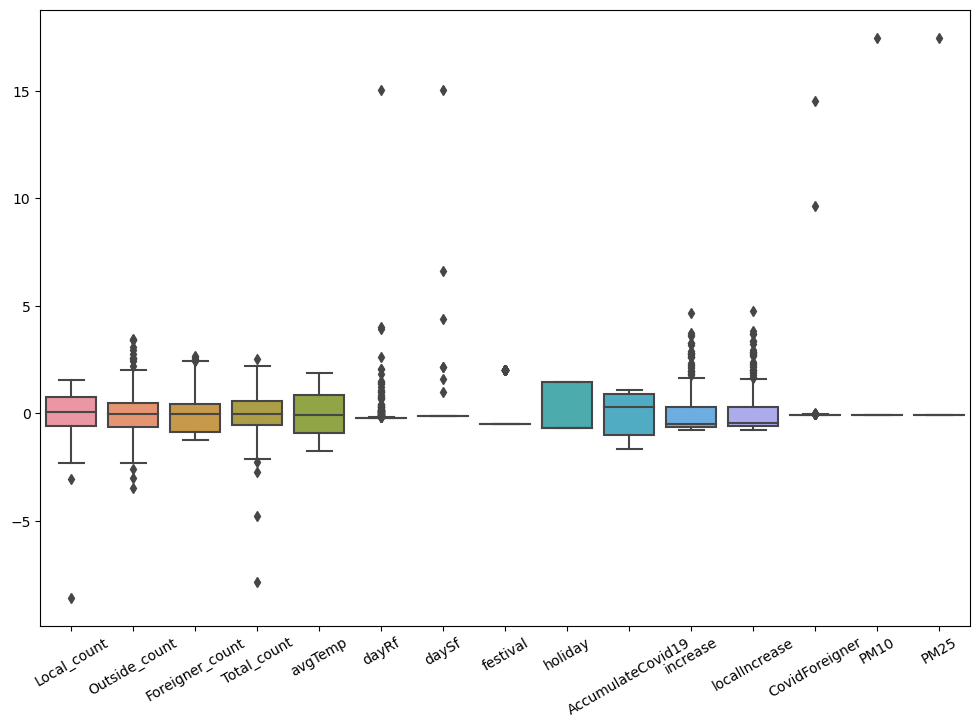

In [19]:
plt.figure(figsize=(12, 8))
df_box2 = sns.boxplot(data=df_jeju_scaled)
df_box2.set_xticklabels(df_box2.get_xticklabels(),rotation = 30)
plt.show()

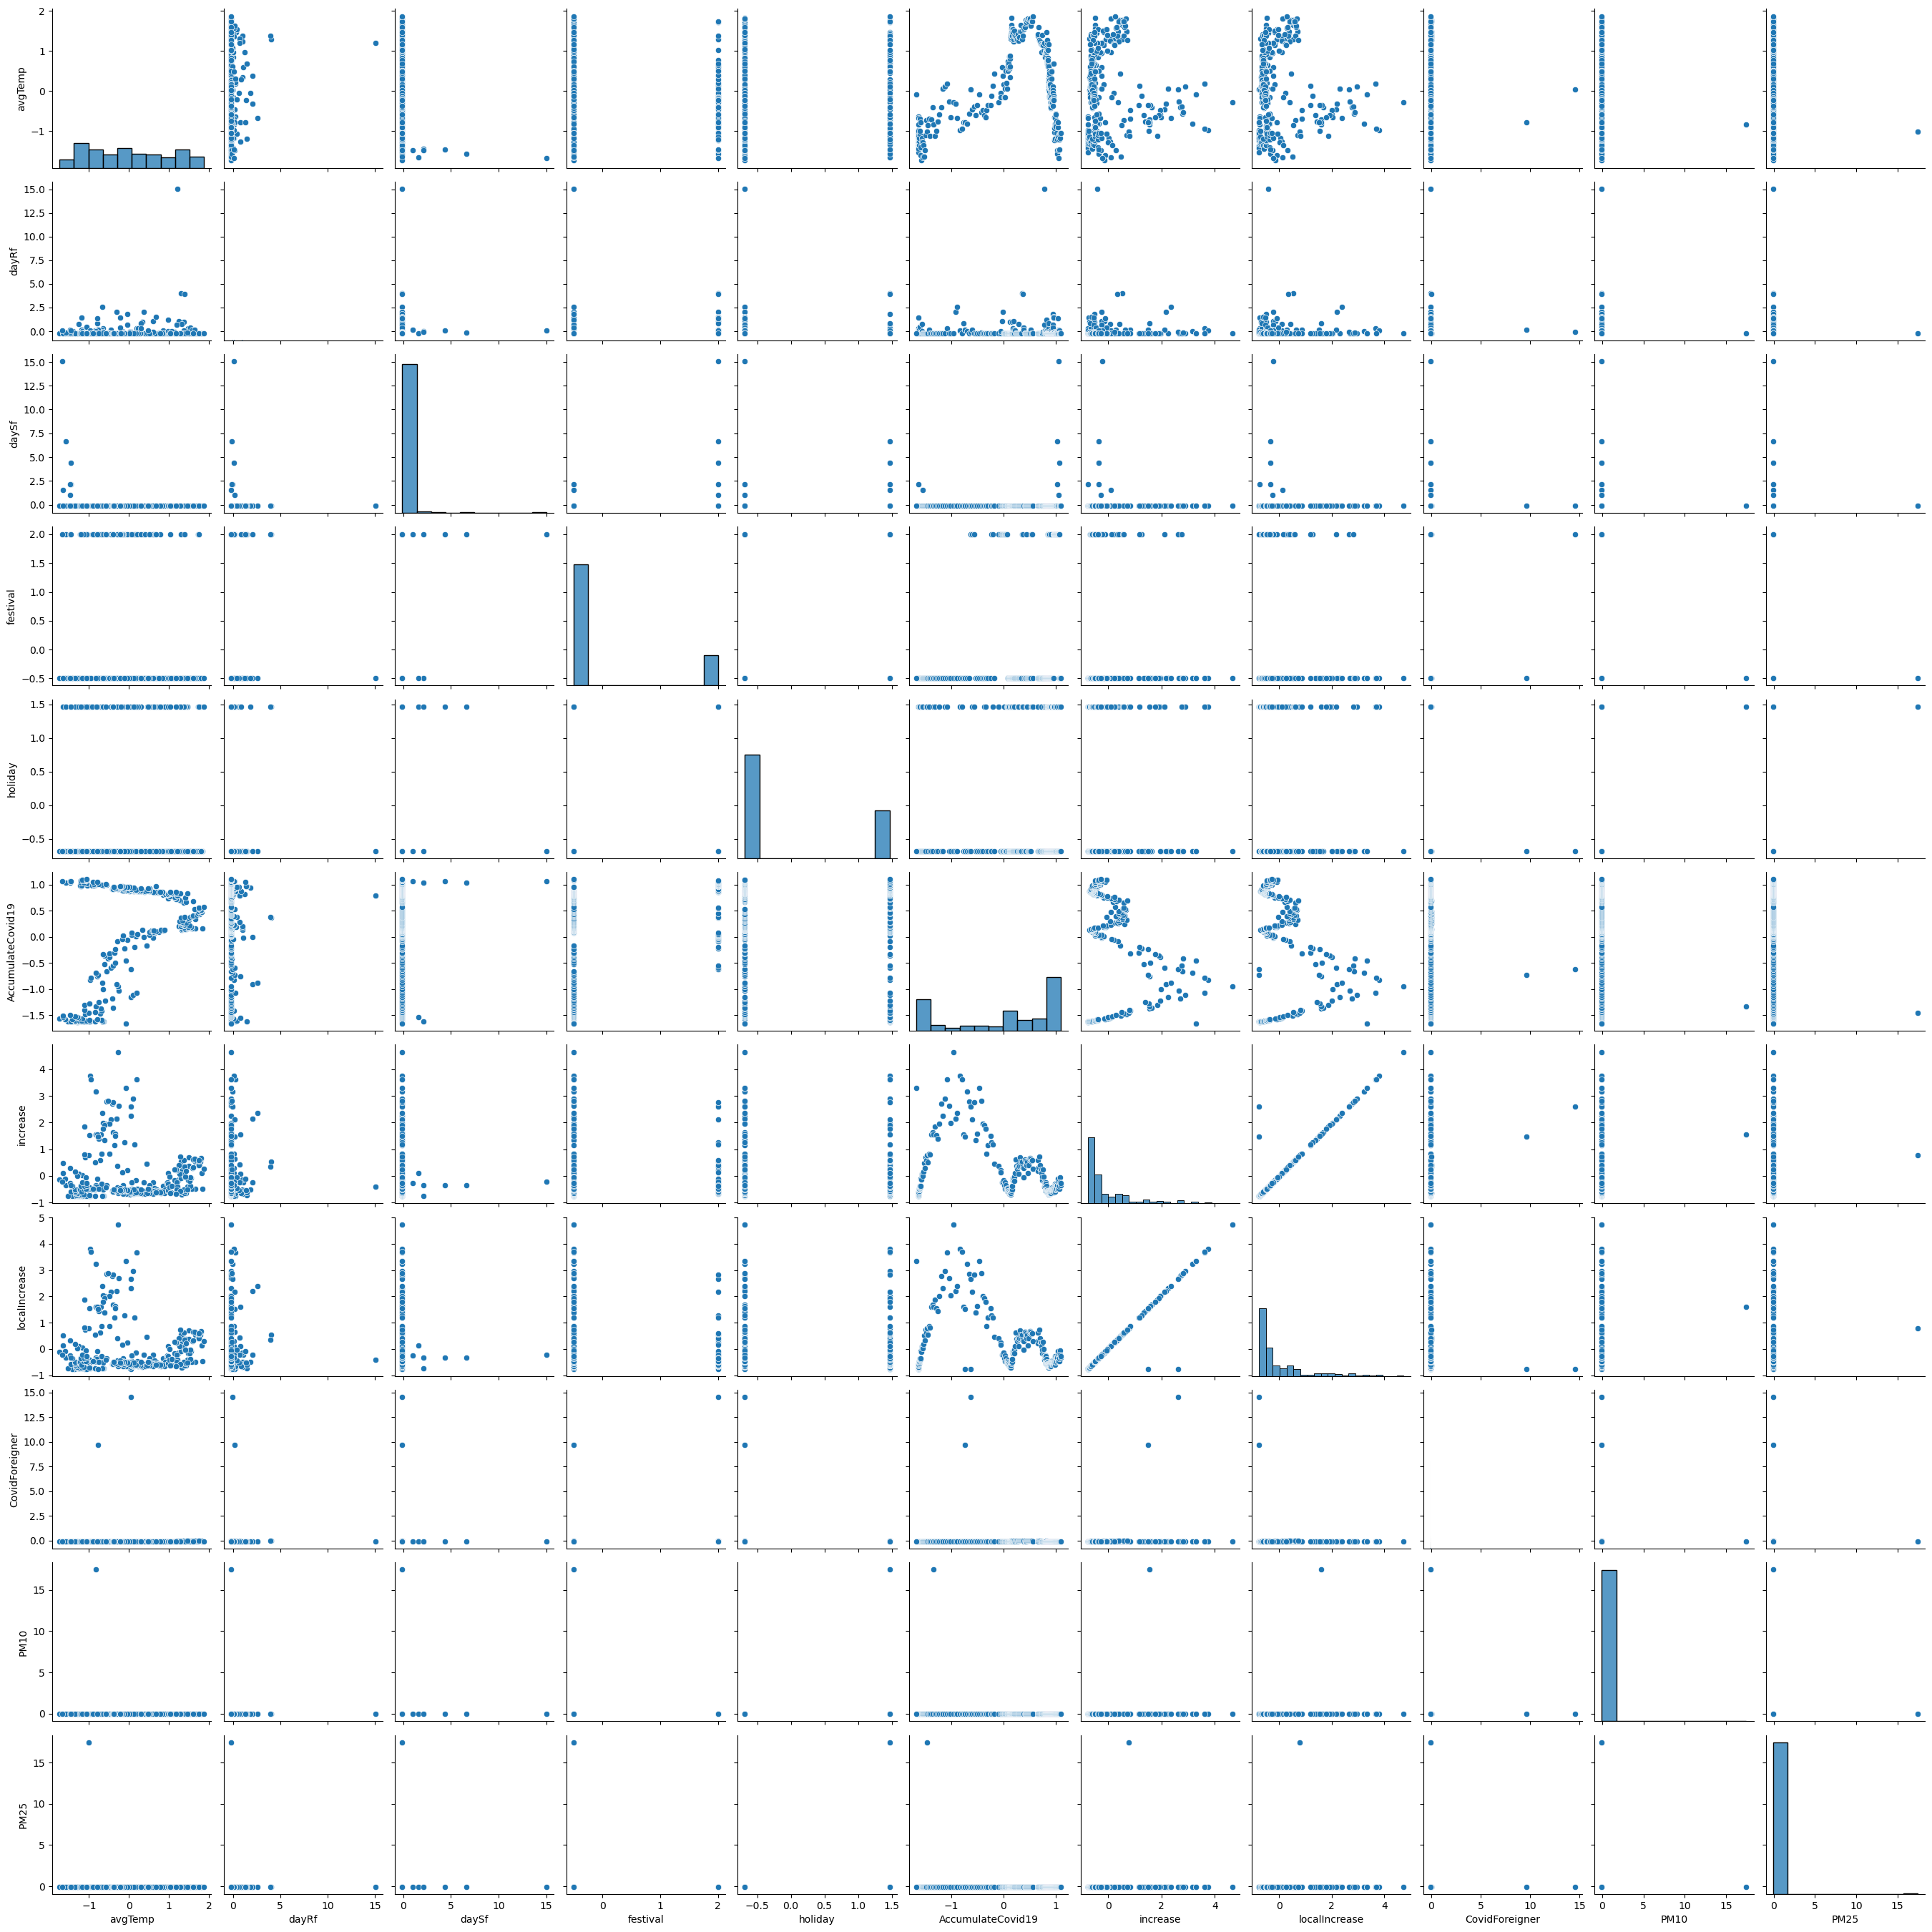

In [20]:
plt
sns.pairplot(dfX_scaled)
plt.show()

In [21]:
dfX_scaled.corr()


,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,localIncrease,CovidForeigner,PM10,PM25
avgTemp,1.000000,0.101795,-0.174417,-0.116917,0.018977,0.519218,-0.013879,-0.011292,-0.011828,-0.047544,-0.057505
dayRf,0.101795,1.000000,0.001775,0.059851,-0.014539,0.050734,0.017207,0.016533,0.003849,-0.012084,-0.012084
daySf,-0.174417,0.001775,1.000000,0.188527,0.031477,0.082218,-0.032620,-0.030811,-0.009565,-0.006305,-0.006305
festival,-0.116917,0.059851,0.188527,1.000000,0.152301,0.299978,-0.044564,-0.063298,0.077445,-0.028571,-0.028571
holiday,0.018977,-0.014539,0.031477,0.152301,1.000000,-0.018134,-0.004414,0.008287,-0.054462,0.084050,0.084050
AccumulateCovid19,0.519218,0.050734,0.082218,0.299978,-0.018134,1.000000,-0.272510,-0.264398,-0.050005,-0.076195,-0.083234
increase,-0.013879,0.017207,-0.032620,-0.044564,-0.004414,-0.272510,1.000000,0.972998,0.171692,0.088763,0.043594
localIncrease,-0.011292,0.016533,-0.030811,-0.063298,0.008287,-0.264398,0.972998,1.000000,-0.060328,0.091141,0.045293
CovidForeigner,-0.011828,0.003849,-0.009565,0.077445,-0.054462,-0.050005,0.171692,-0.060328,1.000000,-0.005140,-0.004790
PM10,-0.047544,-0.012084,-0.006305,-0.028571,0.084050,-0.076195,0.088763,0.091141,-0.005140,1.000000,-0.003279


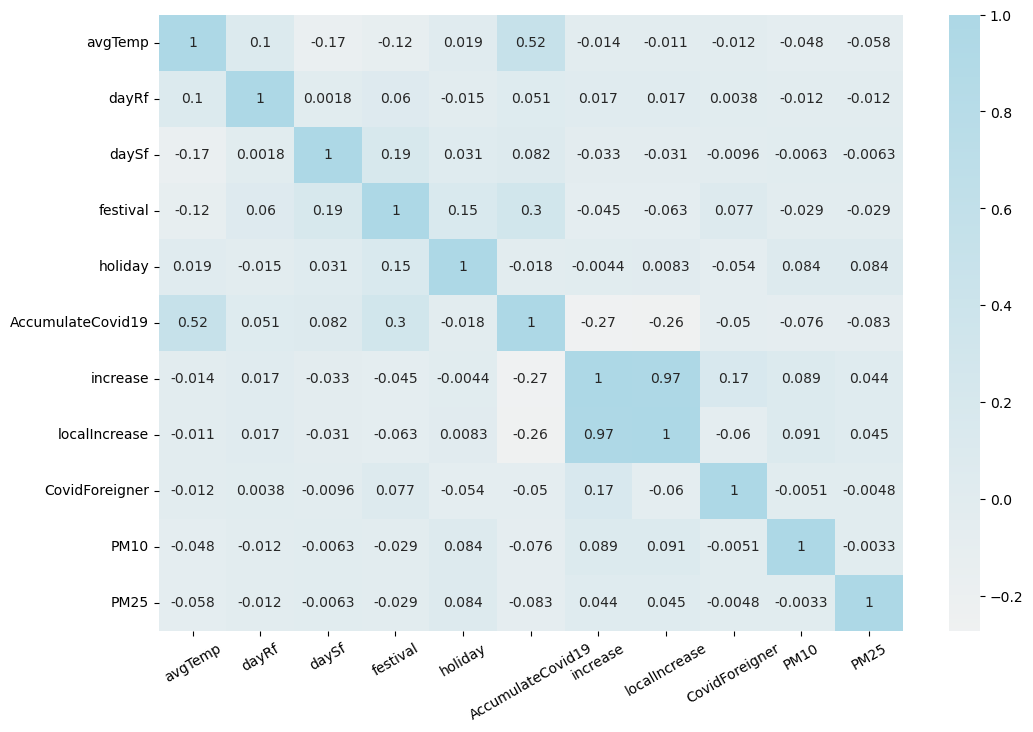

In [22]:
%matplotlib inline
plt.figure(figsize=(12, 8))
cmap = sns.light_palette("lightblue", as_cmap=True)
df_jeju_heat = sns.heatmap(dfX_scaled.corr(), annot=True, cmap=cmap)
df_jeju_heat.set_xticklabels(df_jeju_heat.get_xticklabels(),rotation = 30)
plt.show()

In [23]:
# 학습용 7 : 검증용 3
def get_model1(seed):
    df_train, df_test = train_test_split(df_jeju_scaled, test_size=0.3, random_state=seed)
    model = sm.OLS.from_formula("Outside_count ~ avgTemp + dayRf + daySf + festival + holiday + AccumulateCovid19 + increase + localIncrease + CovidForeigner + PM10 + PM25", data=df_train)
    return df_train, df_test, model.fit()

df_train1, df_test1, result1 = get_model1(3)
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Outside_count   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     12.50
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           9.86e-16
Time:                        18:10:28   Log-Likelihood:                -253.47
No. Observations:                 214   AIC:                             526.9
Df Residuals:                     204   BIC:                             560.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0063      0.055     -0.113      0.910      -0.116       0.103
avgTemp               0.6194      0.073      8.451      0.000       0.475       0.764
dayRf                -0.1399      0.049     -2.848      0.005      -0.237      -0.043
daySf                -0.0156      0.050     -0.309      0.758      -0.115       0.084
festival             -0.0090      0.062     -0.144      0.886      -0.132       0.114
holiday               0.1918      0.057      3.348      0.001       0.079       0.305
AccumulateCovid19    -0.3365      0.079     -4.274      0.000      -0.492      -0.181
increase             -0.0895      0.032     -2.783      0.006      -0.153      -0.026
localIncrease        -0.0837      0.033     -2.545      0.012      -0.148      -0.019
CovidForeigner       -0.0299      0.055     -0.541      0.589      -0.139       0.079
PM10                  0.0004      0.003      0.113      0.910      -0.006       0.007
PM25                  0.0166      0.047      0.354      0.723      -0.076       0.109
==============================================================================
Omnibus:                       26.207   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.542
Skew:                           0.043   Prob(JB):                     1.12e-31
Kurtosis:                       6.997   Cond. No.                     7.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
# Total Sum of Square (종속변수 y의 분산)
# Residual Sum of Square (잔차의 분산, 오차의 크기)
def calc_r2(df_test, result):
    target = df_jeju_scaled.loc[df_test.index].Total_count # 실제값
    predict_test = result.predict(df_test) # 예측값
    RSS = ((predict_test - target) ** 2).sum() # 잔차의 분산
    TSS = ((target - target.mean()) ** 2).sum() # 실제값의 분산
    return 1 - RSS / TSS # 결정계수

In [25]:
train1 = []
test1 = []
for i in range(10):
    df_train1, df_test1, result1 = get_model1(i)
    train1.append(calc_r2(df_train1, result1))
    test1.append(calc_r2(df_test1, result1))

# 과적합 문제가 있음 (학습용과 검증용 차이가 많이남.)
print(train1)
print(test1)

[-0.01268136531849362, -0.03822184390267225, -0.06751146710262357, -0.1395624611360855, -0.01254650257200507, 0.013287708927426034, -0.06619441010173088, -0.0919285968767265, 0.010117753095224336, -0.07623167586374224]
[-0.06983519873070843, -0.5600915788585987, -0.33070562904058454, 0.011564634006345331, -0.16236844569851194, -0.12747846783092265, -0.5801818443731492, -0.8515883525948977, -0.011019467575492436, -0.35404611280092446]


In [26]:
vif = pd.DataFrame()
vif["VIF FActor"] = [variance_inflation_factor(dfX_scaled.values, i) for i in range(dfX_scaled.shape[1])]
vif["features"] = dfX_scaled.columns
vif.sort_values("VIF FActor", ascending=False)

,VIF FActor,features
6,inf,increase
7,inf,localIncrease
8,inf,CovidForeigner
5,1.940366,AccumulateCovid19
0,1.711896,avgTemp
3,1.332951,festival
2,1.088403,daySf
4,1.063191,holiday
9,1.020459,PM10
1,1.018688,dayRf


In [27]:
# VIF 와 pvalue가 높은 increase, localIncrease, CovidForeigner 변수을 제거하고 스케일링 처리한 모형
def get_model2(seed):
    df_train2, df_test2 = train_test_split(df_jeju_scaled, test_size=0.3, random_state=seed)
    model2 = sm.OLS.from_formula("Outside_count ~ avgTemp + dayRf + daySf + festival + holiday + AccumulateCovid19 + PM10 + PM25", data=df_train2)
    return df_train2, df_test2, model2.fit()

df_train2, df_test2, result2 = get_model2(3)
print(result2.summary())
# 성능 하락

                            OLS Regression Results                            
Dep. Variable:          Outside_count   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     14.56
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           2.33e-15
Time:                        18:10:28   Log-Likelihood:                -257.46
No. Observations:                 214   AIC:                             530.9
Df Residuals:                     206   BIC:                             557.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0024      0.05

In [37]:
# 과적합 해소안됨
train2 = []
test2 = []
for i in range(10):
    df_train2, df_test2, result2 = get_model2(i)
    train2.append(calc_r2(df_train2, result2))
    test2.append(calc_r2(df_test2, result2))
print(test2)
print(train2)

[0.13227465530580573, 0.11991021850729322, 0.10172931500216165, 0.3779210039061558, 0.1562393345511769, 0.22828636805438074, 0.21336750958117168, 0.1021255064239901, 0.16032838074040112, 0.16860801568312478]
[0.3921563534108018, 0.2704443639310584, 0.24054102542199818, 0.23252288751194128, 0.3761969689472726, 0.2956446999128899, 0.24076237212279772, 0.2046889867492755, 0.29079550578408564, 0.29805938685799505]


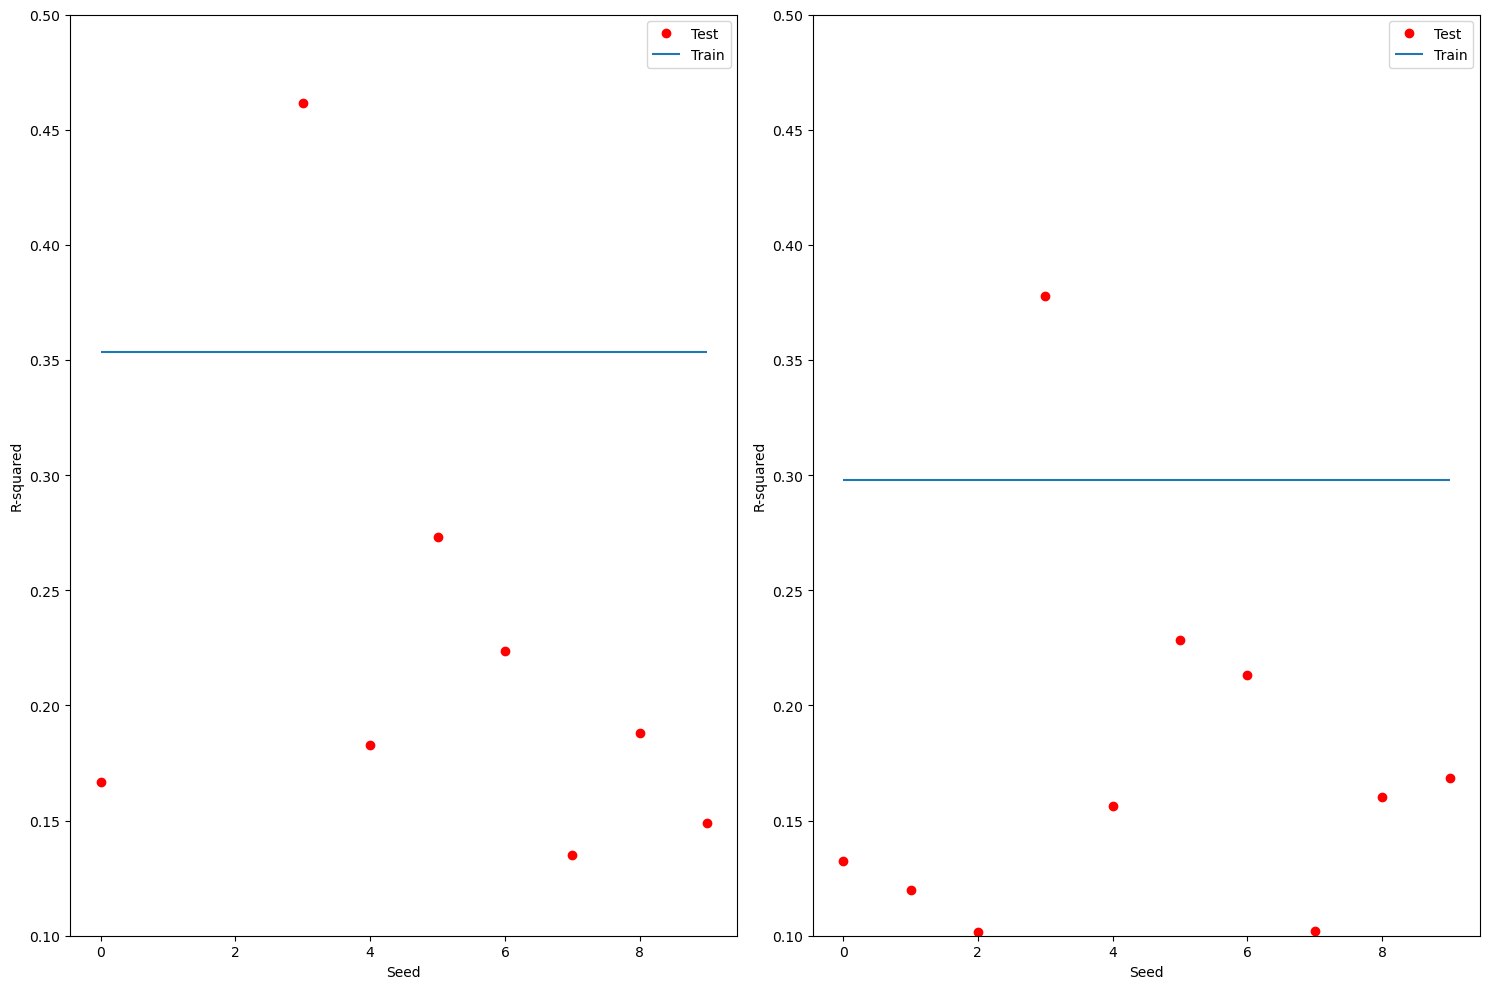

In [55]:
# 다중공선성 제거 전
plt.figure(figsize=(15, 10))
plt.subplot(121) # 1행 2열중 1번 그래프
plt.plot(test1, 'ro', label="Test")
plt.hlines(result1.rsquared, 0, 9, label="Train") # 수평선
plt.legend() # 범례
plt.xlabel("Seed")
plt.ylabel("R-squared")
plt.ylim(0.1, 0.5)

# 다중공선성 제거 후
plt.subplot(122) # 1행 2열중 2번 그래프
plt.plot(test2, 'ro', label="Test")
plt.hlines(result2.rsquared, 0, 9, label="Train")
plt.legend()
plt.xlabel("Seed")
plt.ylabel("R-squared")
plt.ylim(0.1, 0.5)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='baseYmd', ylabel='Total_count'>

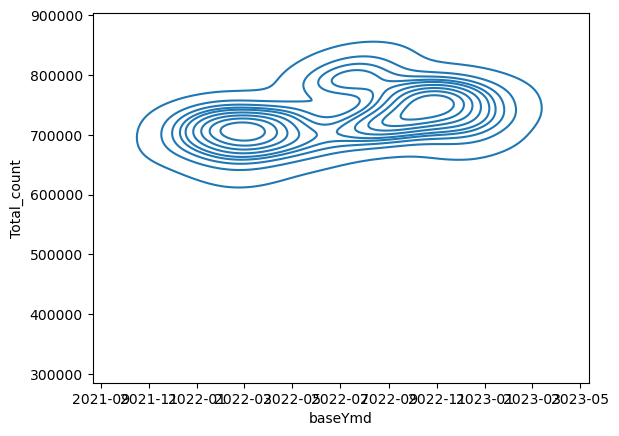

In [53]:
sns.kdeplot(x=df_jeju['baseYmd'], y = df_jeju['Total_count'])


In [ ]:
# 데이터 불러오기
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'], index_col='baseYmd')
df_jeju_foreigner = df.loc[df['areaNm'] == '제주특별자치도']
df_jeju_foreigner.drop(columns=['areaNm', 'daywkDivNm', 'Local_count', 'Outside_count', 'Foreigner_count'], inplace=True)
df_jeju_foreigner.sort_index(inplace=True)

# 시계열 분해 (트렌드, 계절성, 잔차)
decomposition = sm.tsa.seasonal_decompose(df_jeju_foreigner.asfreq('S'), model='additive')

# 트렌드, 계절성, 잔차 추출
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# ARIMA 모델 학습 및 예측
model = sm.tsa.ARIMA(df_jeju_foreigner, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=30)

# 결과 출력
print(trend.head())
print(seasonality.head())
print(residual.head())
print(forecast)


In [49]:
df_jeju_foreigner.drop_duplicates(inplace=True)

In [ ]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('./data/result.csv', parse_dates=['baseYmd'])
sample = df.drop(columns=['areaNm', 'daywkDivNm', 'baseYmd'])

In [ ]:
dfX

,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25
0,-4.3,0.0,0.0,0,1,226698.0,1464.0,177348.0,1429.0,35.0,0,0
1,1.9,0.0,0.0,0,1,25287.0,212.0,21163.0,210.0,2.0,0,0
2,-2.3,0.0,0.0,0,1,23249.0,125.0,21394.0,125.0,0.0,0,0
3,-3.4,0.0,0.0,0,1,36962.0,241.0,30703.0,239.0,2.0,0,0
4,-0.1,0.0,0.0,0,1,8118.0,92.0,7349.0,91.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5256,1.1,0.0,0.0,0,1,972878.0,1799.0,0.0,1798.0,1.0,0,0
5257,0.5,0.0,0.0,1,1,947524.0,2117.0,0.0,2116.0,1.0,0,0
5258,-3.6,0.0,0.0,0,1,1326714.0,3006.0,0.0,3003.0,3.0,0,0
5259,2.0,0.0,0.0,0,1,1733021.0,4344.0,0.0,4342.0,2.0,0,0


In [ ]:
dfy

,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
0,226698.0,1464.0,177348.0,1429.0,35.0,0,0,3698524,1171118,3807,4873448
1,25287.0,212.0,21163.0,210.0,2.0,0,0,1206936,445102,2166,1654204
2,23249.0,125.0,21394.0,125.0,0.0,0,0,1013702,264114,218,1278033
3,36962.0,241.0,30703.0,239.0,2.0,0,0,1076912,496692,2528,1576132
4,8118.0,92.0,7349.0,91.0,1.0,0,0,616735,161028,100,777863
...,...,...,...,...,...,...,...,...,...,...,...
5256,972878.0,1799.0,0.0,1798.0,1.0,0,0,979002,370013,287,1349303
5257,947524.0,2117.0,0.0,2116.0,1.0,0,0,930996,475352,340,1406689
5258,1326714.0,3006.0,0.0,3003.0,3.0,0,0,1341977,726484,278,2068739
5259,1733021.0,4344.0,0.0,4342.0,2.0,0,0,1599500,612486,556,2212542


In [ ]:
scaler = StandardScaler()
df_sample = scaler.fit_transform(sample)
df_sample2 = pd.DataFrame(df_sample, columns=sample.columns)
df_sample2

,avgTemp,dayRf,daySf,festival,holiday,AccumulateCovid19,increase,AccumulateReleased,localIncrease,CovidForeigner,PM10,PM25,Local_count,Outside_count,Foreigner_count,Total_count
0,-1.580092,-0.23909,-0.078193,-0.500238,1.470258,-0.537314,-0.329873,2.480906,-0.326879,-0.042913,-0.089708,-0.115281,1.421211,1.617305,0.857450,1.485134
1,-0.987620,-0.23909,-0.078193,-0.500238,1.470258,-0.679494,-0.447836,-0.001138,-0.444197,-0.056443,-0.089708,-0.115281,-0.187585,-0.005961,0.198944,-0.148530
2,-1.388972,-0.23909,-0.078193,-0.500238,1.470258,-0.680933,-0.456033,0.002533,-0.452378,-0.057263,-0.089708,-0.115281,-0.312355,-0.410624,-0.582756,-0.339425
3,-1.494088,-0.23909,-0.078193,-0.500238,1.470258,-0.671252,-0.445104,0.150469,-0.441406,-0.056443,-0.089708,-0.115281,-0.271540,0.109387,0.344208,-0.188149
4,-1.178740,-0.23909,-0.078193,-0.500238,1.470258,-0.691614,-0.459142,-0.220665,-0.455650,-0.056853,-0.089708,-0.115281,-0.568673,-0.641109,-0.630107,-0.593245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5256,-1.064068,-0.23909,-0.078193,-0.500238,1.470258,-0.010571,-0.298309,-0.337453,-0.291365,-0.056853,-0.089708,-0.115281,-0.334760,-0.173849,-0.555067,-0.303258
5257,-1.121404,-0.23909,-0.078193,1.999050,1.470258,-0.028469,-0.268347,-0.337453,-0.260761,-0.056853,-0.089708,-0.115281,-0.365757,0.061674,-0.533799,-0.274136
5258,-1.513200,-0.23909,-0.078193,-0.500238,1.470258,0.239209,-0.184586,-0.337453,-0.175394,-0.056033,-0.089708,-0.115281,-0.100390,0.623168,-0.558679,0.061833
5259,-0.978064,-0.23909,-0.078193,-0.500238,1.470258,0.526029,-0.058519,-0.337453,-0.046527,-0.056443,-0.089708,-0.115281,0.065890,0.368285,-0.447122,0.134809


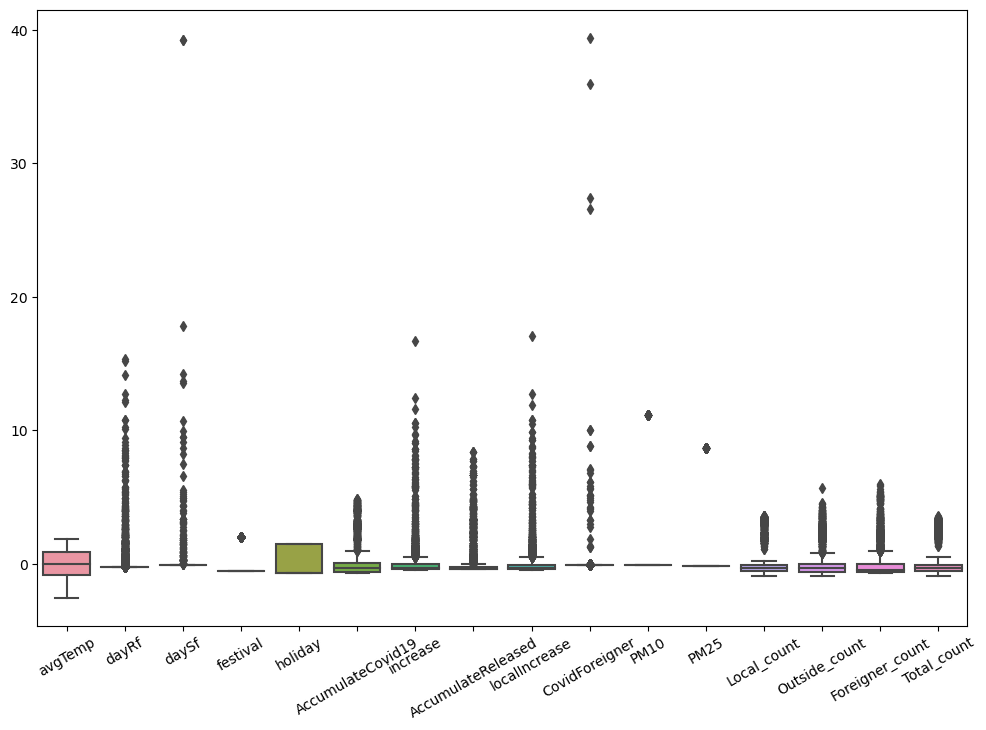

In [ ]:
plt.figure(figsize=(12, 8))
df_sample2_box = sns.boxplot(data=df_sample2)
df_sample2_box.set_xticklabels(df_sample2_box.get_xticklabels(),rotation = 30)
plt.show()

In [ ]:
# 전체 관광객
col_list = ['avgTemp', 'dayRf', 'daySf', 'festival', 'holiday', 'AccumulateCovid19', 'increase', 'AccumulateReleased', 'localIncrease', 'CovidForeigner', 'PM10', 'PM25']

model = sm.OLS.from_formula("Total_count ~" + "+".join(col_list), data=df_sample2)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2130.
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:04:08   Log-Likelihood:                -2808.8
No. Observations:                5261   AIC:                             5644.
Df Residuals:                    5248   BIC:                             5729.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -8.24e-17      0.006  -1.45e-14      1.000      -0.011       0.011
avgTemp               -0.0508      0.006     -8.250      0.000      -0.063      -0.039
dayRf                 -0.0108      0.006     -1.855      0.064      -0.022       0.001
daySf                 -0.0214      0.006     -3.718      0.000      -0.033      -0.010
festival               0.0193      0.006      3.296      0.001       0.008       0.031
holiday                0.0037      0.006      0.639      0.523      -0.008       0.015
AccumulateCovid19      0.8467      0.006    131.852      0.000       0.834       0.859
increase             491.6090    285.121      1.724      0.085     -67.346    1050.564
AccumulateReleased     0.3035      0.008     38.022      0.000       0.288       0.319
localIncrease       -481.2103    279.131     -1.724      0.085   -1028.423      66.003
CovidForeigner      -113.0036     65.521     -1.725      0.085    -241.452      15.445
PM10                  -0.0036      0.006     -0.621      0.535      -0.015       0.008
PM25                   0.0288      0.006      5.021      0.000       0.018       0.040
==============================================================================
Omnibus:                     2435.601   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31677.039
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      14.425   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""